# Risky Project Hoollye

* Fist we hhave to  understand the data and our specific objectives 

In [1]:
## Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import matplotlib as mpl

## Data Cleaning 

Secondly we have to merege all the file using  "result = pd.concat([df1, df4], axis=1, sort=False)" but with I a large a Gpu to load all my data due to the incapacity loading the merging with my 8g RAM and also time  I went through the process of fillitering by selecting the one which are correlated  through  knowlegde idea then removing the missing data. Since my data are already  normalised, I then have to categorized the values thatis given the some specific value since machine only nderstand numerical data 

In [4]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/hoollye/application_train.csv") #reading the dataset
#displaying the first 5 colums of the dataset given
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Counting the number of missing data for every column    
missing_val_count_by_column = (data.isnull().sum())


In [6]:
missing_val_count_by_column

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#filtering that  is we first selected the columns we see related to the target 
cols = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','CNT_CHILDREN','FLAG_OWN_CAR', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS','OCCUPATION_TYPE']

df1 = data[cols]

In [8]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE
0,100002,1,Cash loans,M,0,N,202500.0,406597.5,24700.5,351000.0,House / apartment,Single / not married,Laborers
1,100003,0,Cash loans,F,0,N,270000.0,1293502.5,35698.5,1129500.0,House / apartment,Married,Core staff
2,100004,0,Revolving loans,M,0,Y,67500.0,135000.0,6750.0,135000.0,House / apartment,Single / not married,Laborers
3,100006,0,Cash loans,F,0,N,135000.0,312682.5,29686.5,297000.0,House / apartment,Civil marriage,Laborers
4,100007,0,Cash loans,M,0,N,121500.0,513000.0,21865.5,513000.0,House / apartment,Single / not married,Core staff


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          307511 non-null  int64  
 1   TARGET              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE  307511 non-null  object 
 3   CODE_GENDER         307511 non-null  object 
 4   CNT_CHILDREN        307511 non-null  int64  
 5   FLAG_OWN_CAR        307511 non-null  object 
 6   AMT_INCOME_TOTAL    307511 non-null  float64
 7   AMT_CREDIT          307511 non-null  float64
 8   AMT_ANNUITY         307499 non-null  float64
 9   AMT_GOODS_PRICE     307233 non-null  float64
 10  NAME_HOUSING_TYPE   307511 non-null  object 
 11  NAME_FAMILY_STATUS  307511 non-null  object 
 12  OCCUPATION_TYPE     211120 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 30.5+ MB


In [10]:
# Counting the number of missing data for every column    
df1.isnull().sum()


SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
CNT_CHILDREN              0
FLAG_OWN_CAR              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              12
AMT_GOODS_PRICE         278
NAME_HOUSING_TYPE         0
NAME_FAMILY_STATUS        0
OCCUPATION_TYPE       96391
dtype: int64

In [11]:
test= pd.read_csv("/content/drive/My Drive/Colab Notebooks/hoollye/application_test.csv") 

In [12]:
#filtering that  is we first selected the colums we see related to the data 
cols = ['SK_ID_CURR','NAME_CONTRACT_TYPE','CODE_GENDER','CNT_CHILDREN','FLAG_OWN_CAR', 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS','OCCUPATION_TYPE']



df2 = test[cols]

In [13]:
df2.isnull().sum()

SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
CNT_CHILDREN              0
FLAG_OWN_CAR              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              24
AMT_GOODS_PRICE           0
NAME_HOUSING_TYPE         0
NAME_FAMILY_STATUS        0
OCCUPATION_TYPE       15605
dtype: int64

In [14]:
#droping the na we have 

df1.dropna(axis=0, how = 'any', inplace=True)
df2.dropna(axis=0, how = 'any', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
#Checking for null value
df1.isnull().sum()


SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
CNT_CHILDREN          0
FLAG_OWN_CAR          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
NAME_HOUSING_TYPE     0
NAME_FAMILY_STATUS    0
OCCUPATION_TYPE       0
dtype: int64

In [16]:
df2.isnull().sum()

SK_ID_CURR            0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
CNT_CHILDREN          0
FLAG_OWN_CAR          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
NAME_HOUSING_TYPE     0
NAME_FAMILY_STATUS    0
OCCUPATION_TYPE       0
dtype: int64

# Data transformation
The objectif is to transform categorical variables to its encoded value (numerical) .
We will focus our analysis on bank additionnal full

Encode data : There are some categorical data in the dataset, so we need to encode them

In [17]:
#Encode the categorical data
for col in df1.columns:
    if df1[col].dtype==object:
           df1[col]=df1[col].astype('category')
           df1[col]=df1[col].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Doing same for test data 

In [18]:
#Encode the categorical data
for col in df2.columns:
    if df2[col].dtype==object:
           df2[col]=df2[col].astype('category')
           df2[col]=df2[col].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Now all the data have been categorized we now then go on for the decription of our training data. Description of data taking count of those values that qre numericql vqlues  

In [19]:

df1.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE
count,210887.000000,210887.000000,210887.000000,210887.000000,210887.000000,210887.000000,2.108870e+05,2.108870e+05,210887.000000,2.108870e+05,210887.000000,210887.000000,210887.000000
mean,278215.607515,0.087867,0.101794,0.387691,0.502919,0.380194,1.758169e+05,6.106457e+05,27807.424663,5.481821e+05,1.336787,1.343222,7.850593
std,102823.004193,0.283102,0.302378,0.487244,0.764343,0.485436,2.752764e+05,4.057754e+05,14619.532132,3.723482e+05,1.026770,0.946403,4.400124
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000000,0.000000,0.000000
25%,189167.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17095.500000,2.475000e+05,1.000000,1.000000,4.000000
50%,278221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25843.500000,4.500000e+05,1.000000,1.000000,8.000000
75%,367361.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.115000e+05,8.248230e+05,35613.000000,6.885000e+05,1.000000,1.000000,11.000000
max,456255.000000,1.000000,1.000000,2.000000,19.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,5.000000,4.000000,17.000000


Getting the number of rows and columns in the dataframe 

In [20]:
df1.shape

(210887, 13)

In [21]:
train = df1.iloc[:,0:15] # train data
target = df1['TARGET'] # the result

In [22]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,OCCUPATION_TYPE
0,100002,1,0,1,0,0,202500.0,406597.5,24700.5,351000.0,1,3,8
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,1,3
2,100004,0,1,1,0,1,67500.0,135000.0,6750.0,135000.0,1,3,8
3,100006,0,0,0,0,0,135000.0,312682.5,29686.5,297000.0,1,0,8
4,100007,0,0,1,0,0,121500.0,513000.0,21865.5,513000.0,1,3,3


In [23]:
target.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

# Some data analysis 

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt #visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import random
import xlrd
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from datetime import datetime

In [ ]:
# usefull code for plotting
def oneplot(lab, val, title):
  trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime','orange'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
  layout = go.Layout(dict(title = title,
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

  data = [trace]
  fig = go.Figure(data = data,layout = layout)
  py.iplot(fig)
  

In [ ]:
py.init_notebook_mode(connected=False)

lab = df1["CODE_GENDER"].value_counts().keys().tolist()
#values
val = df1["CODE_GENDER"].value_counts().values.tolist()

oneplot(lab,val, "DIstribution of Mal and Female through the data frame")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

from here we can see that most of the sex, asking the loan are  mostly Male since male has 0 and female=1 and other=2. Mostly male ask for credits may be because they are less female workers or less female that try to go on to projects

In [ ]:
py.init_notebook_mode(connected=False)

lab = df1["CNT_CHILDREN"].value_counts().keys().tolist()
#values
val = df1["CNT_CHILDREN"].value_counts().values.tolist()

oneplot(lab,val, "Children distribution in the data frame")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Most of the appicant that had 0 chldren where 63.9\% which be one factor which affects the target. MOst applicant for credit are those with no children

In [ ]:
# py.init_notebook_mode(connected=False)

lab = df1["TARGET"].value_counts().keys().tolist()
#values
val = df1["TARGET"].value_counts().values.tolist()

oneplot(lab,val, "Target Distribution all over the data")
plt.show()

From the plot above we have that most of the results where rejected  since there are mostly 91.2 \% that was given false that is O thereby rejected. This show that children are important in affecting the target that is they are correlated 

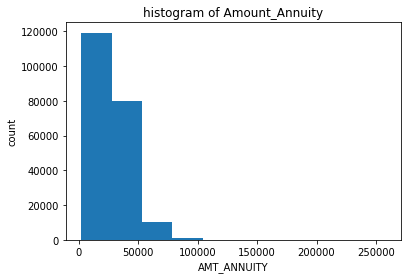

In [ ]:
def drawhist(data,feature):
    plt.hist(data[feature])

drawhist(df1,'AMT_ANNUITY')
plt.ylabel("count")
plt.xlabel("AMT_ANNUITY")
plt.title("histogram of Amount_Annuity")
plt.show()

From the plot we have that most of the value are lests tha 100000 which may be another factor that influences the results

# Trainng the model 


# Support vector Machine 

In [26]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Imputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

%matplotlib inline
from sklearn import metrics
from sklearn import svm

Training my algorithm

In [27]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=0)

In [ ]:

# Defining the model
C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear', C=C),
            svm.SVC(kernel='sigmoid', gamma=0.7, C=C),
            svm.SVC(kernel='rbf', gamma=0.7, C=C),
            svm.SVC(kernel='poly', degree=3, C=C))
a = []
b = []
for clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_predtrain = clf.predict(X_train)
    a.append(metrics.accuracy_score(y_train , y_predtrain))
    b.append(metrics.accuracy_score(y_test , y_pred))
    
d = {"Model":models,"Test prediction":b, "Train prediction":a}
M = pd.DataFrame(d)
M

In [25]:

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# KNN Classification

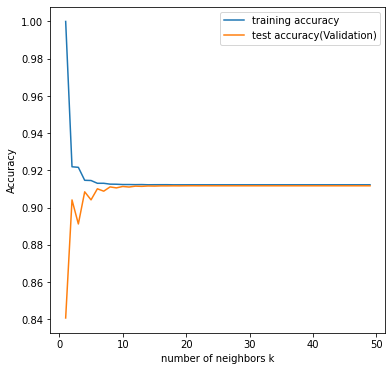

In [ ]:

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_list = range(1, 50)

for k in neighbors_list:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting the model with the data
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_list,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_list,
        test_accuracy, label="test accuracy(Validation)")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors k")
plt.legend()

In [ ]:
print("Acc(test) score: ",test_accuracy, "\n")
print("Training score : ",training_accuracy)

Acc(test) score:  [0.8407700697045853, 0.9041522436657341, 0.891254524475635, 0.9085147075094441, 0.9041996617509919, 0.9101427284366257, 0.9088624401346673, 0.911154314255457, 0.9106327153176221, 0.9113914046817456, 0.91109109014178, 0.9115652709943572, 0.9114546287954226, 0.9116601071648727, 0.9115968830511957, 0.9117075252501304, 0.9117075252501304, 0.9117391373069689, 0.9117233312785497, 0.9117549433353881, 0.9117707493638073, 0.9117549433353881, 0.9117707493638073, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881, 0.9117549433353881] 

Tra

In [ ]:
max(test_accuracy)

0.9117707493638073

since we are doing classification we need the ROC curve

In [ ]:

from sklearn.metrics import roc_curve, auc

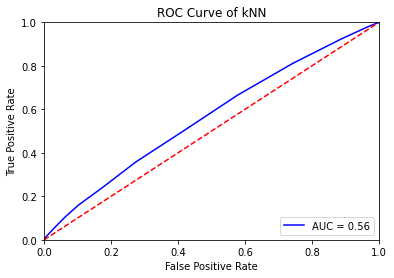

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

Training Accuracy : 1.0
Testing Accuracy : 1.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     57684
           1       0.00      0.00      0.00      5583

    accuracy                           0.91     63267
   macro avg       0.46      0.50      0.48     63267
weighted avg       0.83      0.91      0.87     63267



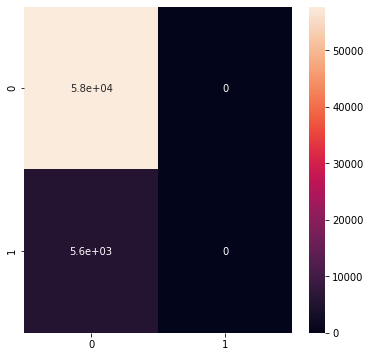

In [ ]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#model = RandomForestClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# evaluating the model
print("Training Accuracy :", knn.score(X_train, y_train))
print("Testing Accuracy :",
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [28]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)
Logistic.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=2,
                   warm_start=False)

In [29]:
# Predicting the Test set results
y_pred = Logistic.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [30]:
cm

array([[57684,     0],
       [    1,  5582]])

In [31]:

#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57684
           1       1.00      1.00      1.00      5583

    accuracy                           1.00     63267
   macro avg       1.00      1.00      1.00     63267
weighted avg       1.00      1.00      1.00     63267



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
test_labels=Logistic.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.999820884828945

In [37]:

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
Random = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)
Random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [38]:

# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [39]:

cm

array([[57684,     0],
       [    0,  5583]])

In [40]:
#Let's see how our model performed
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57684
           1       1.00      1.00      1.00      5583

    accuracy                           1.00     63267
   macro avg       1.00      1.00      1.00     63267
weighted avg       1.00      1.00      1.00     63267



In [41]:
test_labels=Random.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

1.0